In [53]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
import math
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score as val_score
from sklearn.linear_model import LinearRegression as LinReg
import missingno as msno
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split as sk_split
import statsmodels.api as sm
import pycountry
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

%matplotlib inline

In [58]:
allcrops_2000 = pd.read_csv('datasets/allcrops_2000.csv')
# names of all the crops
crop_names = allcrops_2000['Item'].unique()

# remove nan
crop_names = crop_names[:-1]
# list to put our separated crop dataframes
all_crop_dfs = []

# find each crop-separated df and put it in the list of dataframes
for crop in crop_names:
    crop_df = allcrops_2000[(allcrops_2000['Item'] == crop)]
    all_crop_dfs.append(crop_df)

print crop_names

['Apples and products' 'Bananas' 'Barley and products' 'Beer'
 'Beverages, Alcoholic' 'Cereals, Other' 'Citrus, Other'
 'Cocoa Beans and products' 'Coconuts - Incl Copra' 'Coffee and products'
 'Cottonseed Oil' 'Dates' 'Fruits, Other' 'Grapes and products (excl wine)'
 'Groundnut Oil' 'Infant food' 'Maize and products' 'Millet and products'
 'Nuts and products' 'Oilcrops Oil, Other' 'Olive Oil'
 'Olives (including preserved)' 'Oranges, Mandarines' 'Palm Oil' 'Pepper'
 'Pineapples and products' 'Potatoes and products'
 'Pulses, Other and products' 'Rape and Mustard Oil'
 'Rice (Milled Equivalent)' 'Rice (Paddy Equivalent)'
 'Roots & Tuber Dry Equiv' 'Sesame seed' 'Sesameseed Oil' 'Soyabean Oil'
 'Spices, Other' 'Sugar (Raw Equivalent)' 'Sugar, Raw Equivalent'
 'Sugar, Refined Equiv' 'Sunflowerseed Oil' 'Sweeteners, Other'
 'Tea (including mate)' 'Tomatoes and products' 'Vegetables, Other'
 'Wheat and products' 'Wine' 'Beans' 'Beverages, Fermented'
 'Cassava and products' 'Grapefruit and

In [59]:
# Do the same as above, but for livestock
livestock_2000 = pd.read_csv('datasets/livestock_2000.csv')
# list of livestock names
livestock_names = livestock_2000['Item'].unique()
livestock_names = livestock_names[:-1]

# list to put our separated dataframes
livestock_dfs = []

# separate dataframe based on itemname
for crop in livestock_names:
    crop_df = livestock_2000[(livestock_2000['Item'] == crop)]
    livestock_dfs.append(crop_df)

print livestock_names

['Bovine Meat' 'Butter, Ghee' 'Cheese' 'Cream' 'Eggs' 'Fats, Animals, Raw'
 'Freshwater Fish' 'Honey' 'Meat, Other' 'Milk - Excluding Butter'
 'Milk, Whole' 'Mutton & Goat Meat' 'Offals, Edible' 'Poultry Meat'
 'Aquatic Animals, Others' 'Aquatic Plants' 'Cephalopods' 'Crustaceans'
 'Demersal Fish' 'Fish, Body Oil' 'Fish, Liver Oil' 'Marine Fish, Other'
 'Molluscs, Other' 'Pelagic Fish' 'Pigmeat' 'Whey' 'Meat, Aquatic Mammals']


In [60]:
# read in disease rates
column_headers = ["Country", "Year", "Mortality", "Mortality 2", "Mortality 3"]
diabetes = pd.read_csv('datasets/diabetes.csv', names = column_headers)
cardio = pd.read_csv('datasets/cardiovascular.csv', names = column_headers)
cancer= pd.read_csv('datasets/Cancer.csv', names = column_headers)

In [61]:
cardio_2012 = cardio[(cardio["Year"] == "2012")] 
cardio_2000 = cardio[(cardio["Year"] == "2000")] 

In [62]:
diabetes_2012 = diabetes[(diabetes['Year'] == '2012')] 
diabetes_2000 = diabetes[(diabetes['Year'] == '2000')] 
diabetes_2000

,Country,Year,Mortality,Mortality 2,Mortality 3
4,Afghanistan,2000,34.0,35.1,32.8
6,Albania,2000,8.3,8.2,8.3
8,Algeria,2000,67.2,62.1,73.4
10,Angola,2000,35.0,36.4,33.2
12,Argentina,2000,19.9,16.0,25.2
14,Armenia,2000,32.2,33.6,29.2
16,Australia,2000,10.2,8.0,13.0
18,Austria,2000,15.5,12.4,19.3
20,Azerbaijan,2000,19.6,21.4,16.6
22,Bahamas,2000,45.6,41.5,49.9


In [63]:
cancer_2012 = cancer[(cancer['Year'] == ' 2012')] 
cancer_2000 = cancer[(cancer['Year'] == ' 2000')] 
cancer_2012

,Country,Year,Mortality,Mortality 2,Mortality 3
3,Afghanistan,2012,123.6,110.6,142.2
5,Albania,2012,123.1,105.3,142.5
7,Algeria,2012,80.6,78.0,83.9
9,Angola,2012,89.6,86.1,97.9
11,Argentina,2012,131.5,109.1,166.5
13,Armenia,2012,219.6,175.3,277.1
15,Australia,2012,111.0,90.6,135.9
17,Austria,2012,122.0,99.7,152.3
19,Azerbaijan,2012,112.8,88.5,145.0
21,Bahamas,2012,103.8,88.1,131.8


In [134]:
country_names = ['Canada',
 'Turkmenistan',
 'Lithuania',
 'Cambodia',
 'Ethiopia',
 'Swaziland',
 'Argentina',
 'Cameroon',
 'Burkina Faso',
 'Ghana',
 'Saudi Arabia',
 'Japan',
 'Slovenia',
 'Guatemala',
 'Bosnia and Herzegovina',
 'Guinea',
 'Russian Federation',
 'Germany',
 'Spain',
 'Liberia',
 'Maldives',
 'Paraguay',
 'Pakistan',
 'Oman',
 'Cabo Verde',
 'Gabon',
 'New Zealand',
 'Yemen',
 'Jamaica',
 'Albania',
 'United Arab Emirates',
 'Viet Nam',
 'Azerbaijan',
 'Lesotho',
 'Kenya',
 'Tajikistan',
 'Turkey',
 'Afghanistan',
 'Bangladesh',
 'Iran (Islamic Republic of)',
 'India',
 'Mongolia',
 'France',
 'Rwanda',
 'Slovakia',
 'Peru',
 'Norway',
 'Malawi',
 'Benin',
 'Cuba',
 'United States of America',
 'Togo',
 'China',
 'Armenia',
 'Republic of Korea',
 'Dominican Republic',
 'Bolivia (Plurinational State of)',
 'Ukraine',
 'Finland',
 'Indonesia',
 'Central African Republic',
 'Mauritius',
 'Sweden',
 'Australia',
 'Mali',
 'Bulgaria',
 'Romania',
 'Angola',
 'Chad',
 'South Africa',
 'Fiji',
 'Brunei Darussalam',
 'Malaysia',
 'Austria',
 'Mozambique',
 'Uganda',
 'Hungary',
 'Niger',
 'Brazil',
 'Kuwait',
 'Panama',
 'Republic of Moldova',
 'Costa Rica',
 'Luxembourg',
 'Bahamas',
 'Ireland',
 'Nigeria',
 'Ecuador',
 'Belarus',
 'Algeria',
 'El Salvador',
 'Solomon Islands',
 'Chile',
 'Belgium',
 'Thailand',
 'Haiti',
 'Belize',
 'Sierra Leone',
 'Georgia',
 "Lao People's Democratic Republic",
 'Gambia',
 'Philippines',
 'Morocco',
 'Croatia',
 'Guinea-Bissau',
 'United Republic of Tanzania',
 'Switzerland',
 'Venezuela (Bolivarian Republic of)',
 'Iraq',
 'Portugal',
 'Estonia',
 'Uruguay',
 'Lebanon',
 'Uzbekistan',
 'Egypt',
 'Djibouti',
 'Timor-Leste',
 'Colombia',
 'Cyprus',
 'Barbados',
 'Madagascar',
 'Italy',
 'Nepal',
 'Malta',
 'Netherlands',
 'Suriname',
 'Israel',
 'Iceland',
 'Zambia',
 'Senegal',
 'Zimbabwe',
 'Jordan',
 'Denmark',
 'Kazakhstan',
 'Poland',
 'Mauritania',
 'Kyrgyzstan',
 'Trinidad and Tobago',
 'Latvia',
 'Guyana',
 'Honduras',
 'Myanmar',
 'Mexico',
 'Tunisia',
 'Nicaragua',
 "Democratic People's Republic of Korea",
 'Congo',
 'Greece',
 'Sri Lanka',
 'Namibia',
 'Botswana']

In [135]:
cancer = [144.88363236033689,
 123.87023871776628,
 151.62669169329249,
 106.38240337681702,
 100.71319552540812,
 96.680751469993396,
 135.61673876217975,
 70.076939379451417,
 119.76960091914339,
 85.288605953414773,
 84.521034263382319,
 114.77151435820466,
 162.66221983614486,
 120.98936295047655,
 131.83209176939096,
 116.93419024922146,
 164.23727805582143,
 141.82005529625633,
 107.15480112827875,
 106.79977037346519,
 117.04576037798461,
 136.07509669562043,
 78.797089147684019,
 63.607173949186475,
 90.750609071601602,
 70.000022268816608,
 155.20184087102854,
 85.813487515971261,
 127.79692756217713,
 113.75153830466877,
 150.99776001715782,
 121.6376547766484,
 145.60643264390359,
 83.349522932348307,
 116.15228070522258,
 83.522196935582713,
 146.12542762362725,
 125.83317768872868,
 108.51363041299547,
 113.15001741748749,
 87.014298135033357,
 276.98833816008073,
 166.8029909455353,
 160.50302547342724,
 123.24075189361984,
 133.95627995781209,
 130.82235381711888,
 141.15246850561087,
 110.59521496582525,
 98.426169784130579,
 139.45503555375316,
 108.54805150657785,
 135.09142814935831,
 179.24875106595255,
 154.77220891027619,
 83.123711173518998,
 120.13614036719162,
 128.83059425335765,
 114.59571192077271,
 115.3509661058211,
 81.051352032501811,
 73.416280880226481,
 136.91410421209002,
 139.06674617371533,
 99.533173785628961,
 155.2716377492269,
 115.67949888506585,
 60.576351989185994,
 78.161540706325653,
 129.9069783094034,
 112.71114503794543,
 80.64640077551438,
 114.87123598549378,
 151.31042529230416,
 125.2817971072121,
 143.2391377629969,
 195.66306938510166,
 62.098861013813412,
 123.7751490237581,
 76.198326638428256,
 98.372766154096041,
 129.20774680117583,
 110.81141595821263,
 143.62206759263825,
 116.58563638505865,
 145.27917595999395,
 110.33886606329017,
 133.77817581705852,
 158.44866892909616,
 97.84805557985365,
 96.029015501354436,
 131.08185284018214,
 122.28348539477633,
 156.9947103478649,
 121.22858124101126,
 114.06986507246353,
 122.20628226524494,
 79.957687870999848,
 92.106262264448929,
 138.57942152647129,
 60.13776273197373,
 69.225951103450342,
 79.742819240680234,
 171.75814966891619,
 81.185394412179704,
 103.81949954282497,
 116.57965920117256,
 103.85087113330015,
 87.785314279844442,
 141.70953853893252,
 125.69364702930659,
 146.98367559027849,
 122.13335519570451,
 85.350375464804472,
 113.7632522669451,
 109.10593473113543,
 174.83857402246338,
 107.68426415687036,
 130.84056784119727,
 154.45061062358283,
 114.63381690654828,
 116.01754542069185,
 84.361588334543583,
 161.09300864246944,
 146.5445826664687,
 93.367303780519421,
 114.73007707005691,
 135.85037599187513,
 133.92124237728439,
 101.66271431293021,
 241.24532612250826,
 137.67859396035647,
 177.40243817070487,
 167.46037791514584,
 161.61199356235562,
 90.536985657428687,
 140.06705022893283,
 131.13599745619928,
 175.52180926798368,
 174.26271903330422,
 111.88116171313368,
 93.100281236248605,
 83.618619502721558,
 87.428441434551232,
 95.499423803847478,
 173.70923663896278,
 63.652193805729986,
 145.15088382816501,
 69.326900350282074,
 83.356521562349471,
 120.61536615489773]

In [136]:
diabetes = [6.9721334122642116,
 27.604610047718992,
 11.293803119207793,
 19.083658020346178,
 29.268855868404319,
 86.072936848578593,
 17.891447483377206,
 32.617771895309843,
 57.227386828262084,
 29.532345949998742,
 39.360131579783605,
 9.5994284412984783,
 30.340116250486869,
 46.149760692200658,
 22.491491055626582,
 36.420614230748455,
 2.4989439362933208,
 17.704513820536498,
 17.994591422803051,
 44.116169323825474,
 27.774625405097144,
 40.994407582705421,
 34.450230268679874,
 59.280505136053115,
 37.344668813112847,
 26.639980921408984,
 19.729392367132057,
 38.565024446030414,
 74.436718950629938,
 17.306601933950862,
 39.622216375505488,
 16.693465208778143,
 31.939363381912038,
 74.820875386429961,
 30.886282622202039,
 25.430612644167695,
 26.38925690300815,
 25.713419834317239,
 43.629431579644979,
 8.0740676105065532,
 28.720845291308489,
 11.746621807687331,
 10.764043295950099,
 30.963256414578012,
 17.799656294999423,
 26.632252294916341,
 27.949975969412915,
 23.078677505514136,
 38.658700118517316,
 33.743808973839691,
 20.270173978422292,
 40.757110586709366,
 14.658834635802377,
 13.707377606571333,
 28.876621884730685,
 48.420941862275576,
 32.279909385075996,
 18.137653851111544,
 4.8673372410178191,
 65.073633029448857,
 21.324188386046778,
 113.67251388203712,
 -6.8327986412594939,
 13.975052657192677,
 30.78582599028276,
 28.209207513767339,
 8.1816376244785491,
 38.415360886594115,
 52.838564897035965,
 78.202221339151379,
 76.423303821554896,
 49.456544309567562,
 38.413430337471617,
 2.1038810554404481,
 45.511524176420011,
 54.334492097864427,
 2.0657452054815728,
 39.26800919179955,
 42.865732983881195,
 63.770637571788015,
 38.526005141105202,
 2.2941760154993283,
 19.419363526722201,
 9.9141645108279093,
 35.552403528571716,
 6.8204842208988712,
 55.853678515097002,
 18.424766913689666,
 -8.8953657264813053,
 70.537978403112618,
 36.385476593466322,
 77.926071702309912,
 16.289080252483544,
 6.1315769966351921,
 27.626743632606861,
 47.622386246539087,
 51.091727254822338,
 60.314988618430895,
 4.4861333276562316,
 23.475230782189556,
 47.419677937085538,
 31.691983405024661,
 92.824759263452449,
 8.1410323192486711,
 57.67383362578088,
 45.997614365789353,
 0.9903205446708494,
 41.691981676671858,
 34.35883812535171,
 17.699598783412821,
 12.924159197771607,
 26.164874767624781,
 41.141292864716419,
 9.0480936565609404,
 16.204675289814272,
 36.283810148804655,
 37.819958106088237,
 23.207632515530566,
 32.962689988316583,
 70.846564175361152,
 13.284543793208913,
 25.784568157095915,
 51.0812990076872,
 12.396488206645992,
 10.471677042430771,
 54.845845869352644,
 24.293231842013292,
 3.1769843864376544,
 43.199454577413746,
 47.356758625400573,
 25.05750041778202,
 35.114149613986584,
 7.2873105175256612,
 -2.7942812508708368,
 18.707063756735657,
 44.464460600056462,
 2.0162069516965051,
 125.62347120753083,
 20.488522104623364,
 77.688512893075597,
 38.056674791326472,
 35.264579879857507,
 54.602247961764462,
 36.467918378982873,
 42.308871440561148,
 16.294042157494534,
 36.380646185369741,
 -5.6402880435418474,
 49.895287201694053,
 51.554249701478106,
 40.927175899655794]

In [147]:
cardio = [146.15158617747238,
 659.14231930927963,
 433.01652098891435,
 171.70471316663918,
 188.83171252200202,
 383.75368002394754,
 173.19988017720547,
 215.50528566953403,
 234.38444048699677,
 349.79143823027033,
 396.15391119617141,
 137.88007075095419,
 242.50062418205212,
 214.42809362439439,
 349.8877341254198,
 286.23424876433705,
 521.90366722645797,
 201.61506070833818,
 158.89180860470901,
 283.41347025725668,
 346.49722563048653,
 249.80680323280814,
 309.03375964167935,
 378.9009113856755,
 378.42662736504604,
 304.59474005433685,
 215.80584539691444,
 378.3641782766781,
 237.47690195799677,
 513.76090748782633,
 365.04308384706133,
 299.98334746717751,
 555.03394556152193,
 390.20802240907949,
 245.69655216830535,
 575.60187466255979,
 497.55202051338239,
 500.38002562559512,
 258.98066066303852,
 479.32003223981025,
 327.97705572875077,
 682.05207733938391,
 177.90576283276849,
 268.16936631288803,
 341.16479362103814,
 203.69646433319093,
 246.93845224363267,
 271.73428870851745,
 291.70309716269014,
 265.73055867182393,
 208.23680374352574,
 386.90610766537031,
 328.30183133910384,
 539.95280679976588,
 173.14311271118362,
 301.37135561924077,
 317.58541761423373,
 617.165768783972,
 263.0321572129422,
 338.18716858109093,
 255.23320584093997,
 253.54772071961241,
 106.2283917893692,
 134.04101180743532,
 276.42326619278265,
 498.34799008647661,
 480.0165105683227,
 357.09186811071697,
 319.3268218960518,
 322.24070393905862,
 383.13202232992148,
 242.26734297291227,
 300.92251839918686,
 187.0558586663881,
 349.28988267215948,
 325.39859098404912,
 392.27554557440743,
 325.05916964937933,
 228.39058571486871,
 364.8783994685499,
 187.664372358137,
 496.21253251173772,
 176.6679173530442,
 223.1289467880311,
 225.17112188949076,
 242.32414285198607,
 286.05245862292946,
 223.83138577809657,
 556.24715880068243,
 526.92079396734414,
 291.4245556109222,
 333.13250125948503,
 243.19939037862579,
 182.50943111941174,
 250.32350646961623,
 336.39945056468497,
 222.82200273640515,
 506.03940442598048,
 535.71951995823679,
 376.20043567735325,
 255.49892019012597,
 327.80984240881287,
 336.85528861532305,
 351.23786287193127,
 423.07509642800159,
 309.38884599704147,
 229.3804926310404,
 230.54745757452451,
 350.52265699141179,
 254.77459268607188,
 376.34831560173097,
 253.15519564256707,
 305.15469037144908,
 624.8031957450861,
 433.45840578749096,
 335.57826285135843,
 394.84834362638651,
 178.55491285551963,
 252.4976071072623,
 222.95796145252478,
 348.46325433393275,
 96.003637338980468,
 290.2234935514573,
 273.0038009427501,
 114.1063538831018,
 228.73226203502205,
 195.86948288124651,
 157.56862461155077,
 255.56553287015885,
 289.59605880750735,
 261.53457633217295,
 351.4800734160911,
 144.88230919982755,
 625.78896007393473,
 399.28503690439589,
 335.36247810950641,
 654.91110405778522,
 356.55198341444566,
 473.15774200338961,
 374.60852727754315,
 207.82332038503031,
 325.56645483283444,
 160.95075654799206,
 378.14245506414034,
 251.62137888558826,
 388.33304667938665,
 351.40618854866409,
 273.03472987642658,
 406.56539143954848,
 315.48266111114424,
 261.05976184175461]

In [148]:
print len(country_names)
print len(cancer)
print len(diabetes)
print len(cardio)

151
151
151
151


In [149]:
full_dataset = np.column_stack((country_names, cancer, diabetes, cardio))
full_dataset = np.sort(full_dataset, axis=0, kind='quicksort', order=None)
country_names = full_dataset[:,0]

In [150]:
def change_names(country_names):
    input_countries = country_names
    counter = 1
    for each in range(1, len(input_countries)):
        if input_countries[counter] == 'Bolivia (Plurinational State of)':
            input_countries[counter] = 'Bolivia, Plurinational State of'
        if input_countries[counter] == 'Iran (Islamic Republic of)':
            input_countries[counter] = 'Iran, Islamic Republic of'
        if input_countries[counter] == "C\xc3\xb4te d'Ivoire":
            input_countries[counter] = 'Cote d\'Ivoire'
        if input_countries[counter] == 'China, Macao SAR':
            input_countries[counter] = 'Macao'
        if input_countries[counter] == "Democratic People's Republic of Korea":
            input_countries[counter] = 'Korea, Democratic People\'s Republic of'
        if input_countries[counter] == 'Republic of Korea':
            input_countries[counter] = 'Korea, Republic of'
        if input_countries[counter] == 'The former Yugoslav Republic of Macedonia':
            input_countries[counter] = 'Macedonia, Republic of'
        if input_countries[counter] == 'Sudan (former)':
            input_countries[counter] = 'Sudan'
        if input_countries[counter] == 'Venezuela (Bolivarian Republic of)':
            input_countries[counter] = 'Venezuela, Bolivarian Republic of'
        if input_countries[counter] == 'United States of America':
            input_countries[counter] = 'United States'
        if input_countries[counter] == 'China, Taiwan Province of':
            input_countries[counter] = 'Taiwan, Province of China'
        if input_countries[counter] == 'China, mainland':
            input_countries[counter] = 'China'
        if input_countries[counter] == 'China, Hong Kong SAR':
            input_countries[counter] = 'Hong Kong'
        if input_countries[counter] == 'Republic of Moldova':
            input_countries[counter] = 'Moldova, Republic of'
        if input_countries[counter] == 'United Republic of Tanzania':
            input_countries[counter] = 'Tanzania, United Republic of'
        if input_countries[counter] == 'Czechia':
            input_countries[counter] = 'Czechoslovakia'
        if input_countries[counter] == 'Netherlands Antilles':
            input_countries[counter] = 'Netherlands'
        if input_countries[counter] == 'Cabo Verde':
            input_countries[counter] = 'Cabo Verde, Republic of'
        counter = counter + 1

In [151]:
change_names(country_names)
country_names

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia, Plurinational State of', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde, Republic of', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jo

In [152]:
# create array of countries to convert country name to 3 letter Alpha code
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha3

# iterate through all countries and compile list of codes, return unknown if no code is present
codes = [countries.get(country, country) for country in country_names]

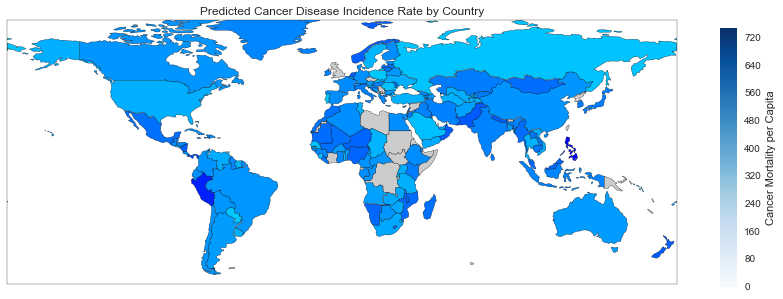

In [159]:
# plot cartopy world map projection
# ax = plt.axes(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(12,6), 
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-150, 60, -25, 60])

# initialize the type of projdction and map outline format
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

# initialize counter variable k 
k = 0
for country in countries:
    
    # for each country with a country code, color the country in proportion to the cardiovascular mortality rate
    if any(country.attributes['adm0_a3'] in j for (k,j) in enumerate(codes)):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=[0, 1-1*(float(full_dataset[k,1])/277), 1],
                          label=country.attributes['adm0_a3'])
        k = k + 1
    
    # since USA has a unique format, append the USA's separate mortality index
    elif country.attributes['adm0_a3'] == 'GRL':
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=[0, 1-1*(float(full_dataset[k,1])/277), 1],
                          label=country.attributes['adm0_a3'])
    
    # for all countries with no cardiovascular mortality data, leave the country blank
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor = [0.8, 0.8, 0.8],
                          label=country.attributes['adm0_a3'])
    ax.set_title('Predicted Cancer Disease Incidence Rate by Country')
    
    cmap = plt.cm.Blues
    cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
    norm = mpl.colors.Normalize(vmin=0, vmax=750)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
    cb.set_label('Cancer Mortality per Capita')

plt.show()

In [160]:
cancer_2000[["Country", "Mortality"]]
cancer_rates = cancer_2000["Mortality"].as_matrix()
country_list_actual = cancer_2000["Country"].as_matrix()
change_names(country_list_actual)
cancer_full = np.column_stack((country_list_actual, cancer_rates))

In [161]:
cancer_rates

array(['122.9', '137.7', '75.1', '74.8', '136.8', '209.0', '130.0',
       '132.5', '158.8', '105.1', '121.9', '93.7', '174.6', '144.2',
       '149.7', '119.9', '98.8', '98.4', '111.2', '132.9', '103.1',
       '127.0', '77.0', '134.7', '115.9', '128.2', '121.1', '72.1',
       '110.9', '68.9', '142.1', '86.5', '86.9', '133.5', '139.2', '104.4',
       '98.9', '63.8', '113.9', '165.0', '128.7', '110.2', '181.2',
       '156.6', '97.3', '175.3', '91.5', '82.2', '120.5', '129.6', '110.8',
       '67.1', '89.3', '159.0', '100.7', '121.6', '115.1', '151.5', '54.7',
       '71.6', '108.7', '143.9', '80.8', '134.2', '110.5', '100.1', '87.8',
       '180.5', '117.3', '114.4', '206.4', '131.7', '68.4', '121.6',
       '119.7', '86.5', '153.0', '127.5', '133.0', '128.3', '123.1',
       '107.1', '171.5', '126.4', '92.7', '102.5', '145.1', '149.6',
       '123.2', '88.2', '121.6', '121.8', '154.6', '139.8', '156.6',
       '119.4', '115.3', '126.3', '119.7', '128.4', '66.9', '84.6', '88.0',
   

In [162]:
# create array of countries to convert country name to 3 letter Alpha code
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha3

# iterate through all countries and compile list of codes, return unknown if no code is present
codes = [countries.get(country, country) for country in country_list_actual]

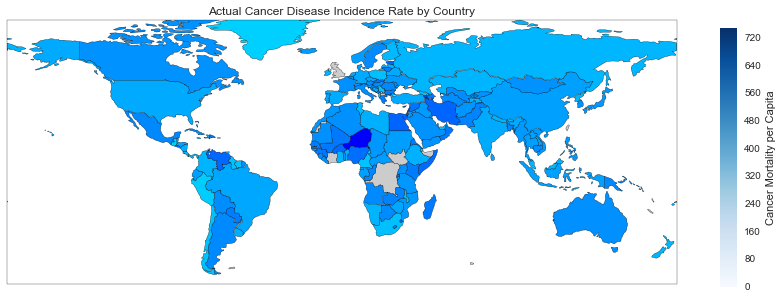

In [163]:
# plot cartopy world map projection
# ax = plt.axes(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(12,6), 
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-150, 60, -25, 60])

# initialize the type of projdction and map outline format
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

# initialize counter variable k 
k = 0
for country in countries:
    
    # for each country with a country code, color the country in proportion to the cardiovascular mortality rate
    if any(country.attributes['adm0_a3'] in j for (k,j) in enumerate(codes)):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=[0, 1-1*(float(cancer_full[k,1])/299.0), 1],
                          label=country.attributes['adm0_a3'])
        k = k + 1
    
    # since USA has a unique format, append the USA's separate mortality index
    elif country.attributes['adm0_a3'] == 'GRL':
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=[0, 1-1*(float(cancer_full[k,1])/299.0), 1],
                          label=country.attributes['adm0_a3'])
    
    # for all countries with no cardiovascular mortality data, leave the country blank
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor = [0.8, 0.8, 0.8],
                          label=country.attributes['adm0_a3'])
    ax.set_title('Actual Cancer Disease Incidence Rate by Country')
    
    cmap = plt.cm.Blues
    cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
    norm = mpl.colors.Normalize(vmin=0, vmax=750)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
    cb.set_label('Cancer Mortality per Capita')

plt.show()

---

In [64]:
# create a list of unique country names
country_list = cardio['Country'].unique()[2:]

# initialize array of cardiovascular values
all_cardio = []
for place in country_list:
    
    # for each country, append that country's 2000 cardiovascular disease mortality rate
    cardio_df = cardio[(cardio['Country'] == place) & (cardio['Year'] == '2000')]
    all_cardio.append(cardio_df)

In [65]:
# obtain all countries with crop data
country_names = allcrops_2000['Country'].unique()
country_names = country_names[:-1]
country_names

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Congo', 'Costa Rica', "C\xc3\xb4te d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Gha

In [46]:
codes

[u'ARM',
 u'AFG',
 u'ALB',
 u'DZA',
 u'AGO',
 u'ATG',
 u'ARG',
 u'AUS',
 u'AUT',
 u'BHS',
 u'BRB',
 u'BGD',
 u'BMU',
 u'BOL',
 u'BWA',
 u'BRA',
 u'BLZ',
 u'SLB',
 u'BRN',
 u'BGR',
 u'MMR',
 u'CMR',
 u'CAN',
 'Cabo Verde, Republic of',
 u'CAF',
 u'LKA',
 u'TCD',
 u'CHL',
 u'CHN',
 u'COL',
 u'COG',
 u'CRI',
 u'CUB',
 u'CYP',
 u'AZE',
 u'BEN',
 u'DNK',
 u'DMA',
 u'DOM',
 u'BLR',
 u'ECU',
 u'EGY',
 u'SLV',
 u'EST',
 u'FJI',
 u'FIN',
 u'FRA',
 u'PYF',
 u'DJI',
 u'GEO',
 u'GAB',
 u'GMB',
 u'DEU',
 u'BIH',
 u'GHA',
 u'KIR',
 u'GRC',
 u'GRD',
 u'GTM',
 u'GIN',
 u'GUY',
 u'HTI',
 u'HND',
 u'HKG',
 u'HUN',
 u'HRV',
 u'ISL',
 u'IND',
 u'IDN',
 u'IRN',
 u'IRQ',
 u'IRL',
 u'ISR',
 u'ITA',
 "Cote d'Ivoire",
 u'KAZ',
 u'JAM',
 u'JPN',
 u'JOR',
 u'KGZ',
 u'KEN',
 u'KHM',
 u'PRK',
 u'KOR',
 u'KWT',
 u'LVA',
 u'LAO',
 u'LBN',
 u'LSO',
 u'LBR',
 u'LTU',
 u'MAC',
 u'MDG',
 u'MWI',
 u'MYS',
 u'MDV',
 u'MLI',
 u'MLT',
 u'MRT',
 u'MUS',
 u'MEX',
 u'MNG',
 u'MAR',
 u'MOZ',
 u'MDA',
 u'NAM',
 u'NPL',
 u'NLD',


/Users/Christine/anaconda/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


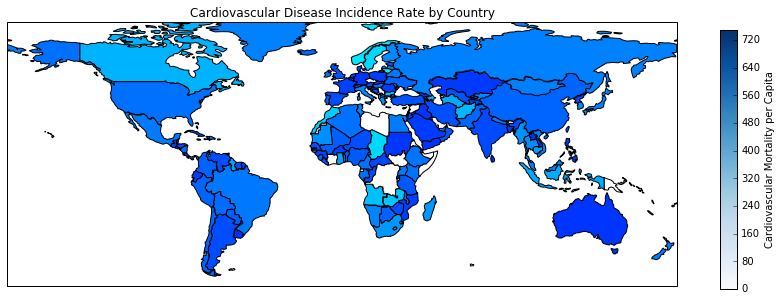

In [47]:
# plot cartopy world map projection
# ax = plt.axes(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(12,6), 
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-150, 60, -25, 60])

# initialize the type of projdction and map outline format
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

# initialize counter variable k 
k = 0
for country in countries:
    
    # for each country with a country code, color the country in proportion to the cardiovascular mortality rate
    if any(country.attributes['adm0_a3'] in j for (k,j) in enumerate(codes)):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=[0, 1*(float(all_cardio[k]['Mortality'])/750), 1],
                          label=country.attributes['adm0_a3'])
        k = k + 1
    
    # since USA has a unique format, append the USA's separate mortality index
    elif country.attributes['adm0_a3'] == 'GRL':
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=[0, 1*(float(all_cardio[156]['Mortality'])/750), 1],
                          label=country.attributes['adm0_a3'])
    
    # for all countries with no cardiovascular mortality data, leave the country blank
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor = [1, 1, 1],
                          label=country.attributes['adm0_a3'])
    ax.set_title('Cardiovascular Disease Incidence Rate by Country')
    
    cmap = plt.cm.Blues
    cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
    norm = mpl.colors.Normalize(vmin=0, vmax=750)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
    cb.set_label('Cardiovascular Mortality per Capita')

plt.show()